In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
filename = '.\logs\ModelThatLearnedStuff.csv'
df = pd.read_csv(filename)

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Finn\AppData\Local\Temp\ipykernel_5396\3355028554.py:1: SyntaxWarning: invalid escape sequence '\l'
  filename = '.\logs\ModelThatLearnedStuff.csv'


In [14]:
df

,env_index,episode,timestep,action,obs,reward,done,info
0,0,0,0,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=1, market_data_date..."
1,0,0,1,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=2, market_data_date..."
2,0,0,2,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=3, market_data_date..."
3,0,0,3,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=4, market_data_date..."
4,0,0,4,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=5, market_data_date..."
...,...,...,...,...,...,...,...,...
16540,0,0,16540,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=16541, market_data_..."
16541,0,0,16541,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=16542, market_data_..."
16542,0,0,16542,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=16543, market_data_..."
16543,0,0,16543,1,"[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50....",0.0,False,"{'snapshot': Snapshot(step=16544, market_data_..."


In [15]:
# only keep [timestep and info] 
df = df[['timestep', 'info']]
df

,timestep,info
0,0,"{'snapshot': Snapshot(step=1, market_data_date..."
1,1,"{'snapshot': Snapshot(step=2, market_data_date..."
2,2,"{'snapshot': Snapshot(step=3, market_data_date..."
3,3,"{'snapshot': Snapshot(step=4, market_data_date..."
4,4,"{'snapshot': Snapshot(step=5, market_data_date..."
...,...,...
16540,16540,"{'snapshot': Snapshot(step=16541, market_data_..."
16541,16541,"{'snapshot': Snapshot(step=16542, market_data_..."
16542,16542,"{'snapshot': Snapshot(step=16543, market_data_..."
16543,16543,"{'snapshot': Snapshot(step=16544, market_data_..."


In [17]:
from common.env.forex_env import Snapshot, SimpleOHLC

# find 'close=' in info
df['equity'] = df['info'].apply(lambda x: x.split('close=')[1].split(' ')[0])
df['equity'] = df['equity'].apply(lambda x: x.split('))')[0])

#set snapshot as a floatS
df['equity'] = df['equity'].astype(float)
df

C:\Users\Finn\AppData\Local\Temp\ipykernel_5396\1139565952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['equity'] = df['info'].apply(lambda x: x.split('close=')[1].split(' ')[0])
C:\Users\Finn\AppData\Local\Temp\ipykernel_5396\1139565952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['equity'] = df['equity'].apply(lambda x: x.split('))')[0])
C:\Users\Finn\AppData\Local\Temp\ipykernel_5396\1139565952.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,timestep,info,equity
0,0,"{'snapshot': Snapshot(step=1, market_data_date...",10000.000000
1,1,"{'snapshot': Snapshot(step=2, market_data_date...",10000.000000
2,2,"{'snapshot': Snapshot(step=3, market_data_date...",10000.000000
3,3,"{'snapshot': Snapshot(step=4, market_data_date...",10000.000000
4,4,"{'snapshot': Snapshot(step=5, market_data_date...",10000.000000
...,...,...,...
16540,16540,"{'snapshot': Snapshot(step=16541, market_data_...",10383.758029
16541,16541,"{'snapshot': Snapshot(step=16542, market_data_...",10383.758029
16542,16542,"{'snapshot': Snapshot(step=16543, market_data_...",10383.758029
16543,16543,"{'snapshot': Snapshot(step=16544, market_data_...",10383.758029


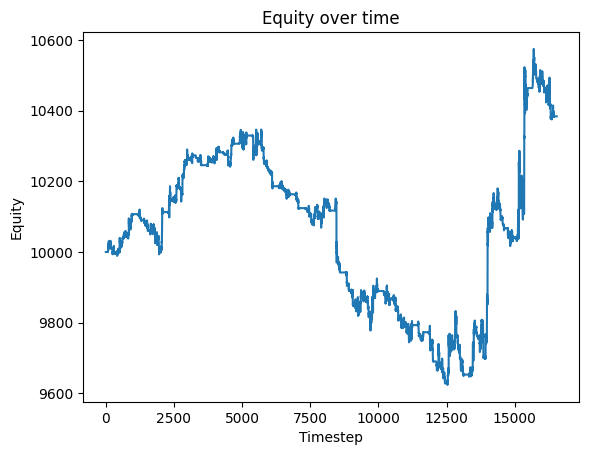

In [18]:
# plot close per timestep
plt.plot(df['timestep'], df['equity'])
plt.xlabel('Timestep')
plt.ylabel('Equity')
plt.title('Equity over time')
plt.show()

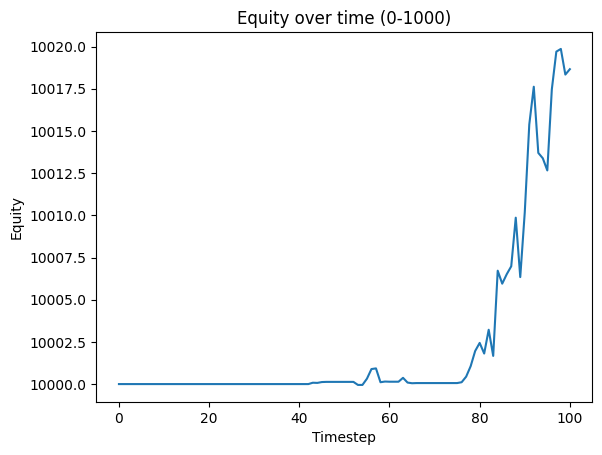

In [20]:
# show timestep 0-1000
df_0_1000 = df[df['timestep'] <= 100]
plt.plot(df_0_1000['timestep'], df_0_1000['equity'])
plt.xlabel('Timestep')
plt.ylabel('Equity')
plt.title('Equity over time (0-1000)')
plt.show()